# PENAMBANGAN DATA - UTS

Lakukan analisa terhadap data pada https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra dengan menggunakan klasifikasi
- metode KNN
- metode pohon keputusan (Desision tree)


**METODE KNN**
 
 KNN adalah algoritma klasifikasi yang paling sederhana dalam mengklasifikasikan sebuah gambar kedalam sebuah label. Metode ini mudah dipahami dibandingkan metode lain karena mengklasifikasikan berdasarkan jarak terdekat dengan objek lain (tetangga).

**STEP 1**

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/135-ShintaNuriyatulMahmudiyah/Data-mining/gh-pages/dataR2.csv")

In [3]:
df.head

<bound method NDFrame.head of      Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  Classification  
0     7.99585  417.114               1  
1     4.064

In [4]:
#pengecekan banyaknya baris dan kolom pada data
df.shape

(116, 10)

In [8]:
X = df.drop(columns=['Classification'])
X.head

<bound method NDFrame.head of      Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  
0     7.99585  417.114  
1     4.06405  468.786  
2     9.27715  554

In [9]:
y = df['Classification'].values
y[0:5]

array([1, 1, 1, 1, 1])

**STEP 2**

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1, stratify=y)

In [11]:
print(X_train.shape)
print(X_test.shape)

(92, 9)
(24, 9)


In [12]:
print(y_train.shape)
print(y_test.shape)

(92,)
(24,)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1,26)
scores = {}
scores_list=[]
for k in k_range:
  knn=KNeighborsClassifier (n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  scores[k]=metrics.accuracy_score(y_test,y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

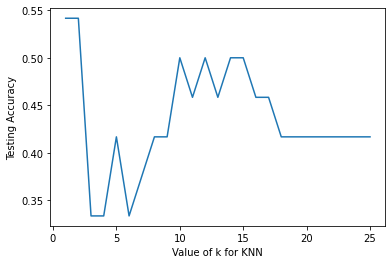

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range,scores_list)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')

**METODE DECISION TREE**
Klasifikasi decision tree merupakan salah satu teknik terkenal dalam data mining dan merupakan salah satu metode yang popular dalam menentukan keputusan suatu kasus. Metode ini tidak memerlukan proses pengelolaan pengetahuan terlebih dahulu dan dapat menyelesaikan kasus-kasus yang memiliki dimensi yang besar

In [15]:
import numpy as np
import pandas as pd

In [16]:
df=pd.read_csv("https://raw.githubusercontent.com/135-ShintaNuriyatulMahmudiyah/Data-mining/gh-pages/dataR2.csv")

In [17]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [18]:
df.shape

(116, 10)

In [24]:
X = df.drop(columns=['Classification'])
X.head

<bound method NDFrame.head of      Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  
0     7.99585  417.114  
1     4.06405  468.786  
2     9.27715  554

In [25]:
y = df['Classification'].values
y[0:5]

array([1, 1, 1, 1, 1])

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
print(X_train.shape)
print(X_test.shape)

(92, 9)
(24, 9)


In [35]:
print(y_train.shape)
print(y_test.shape)

(92,)
(24,)


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
from sklearn import tree
from matplotlib import pyplot as plt
# Create DecisionTree Classifier
clf_tree = tree.DecisionTreeClassifier(criterion="entropy")
clf_tree = clf_tree.fit(X_train_scaled, y_train)

membuat design decision tree

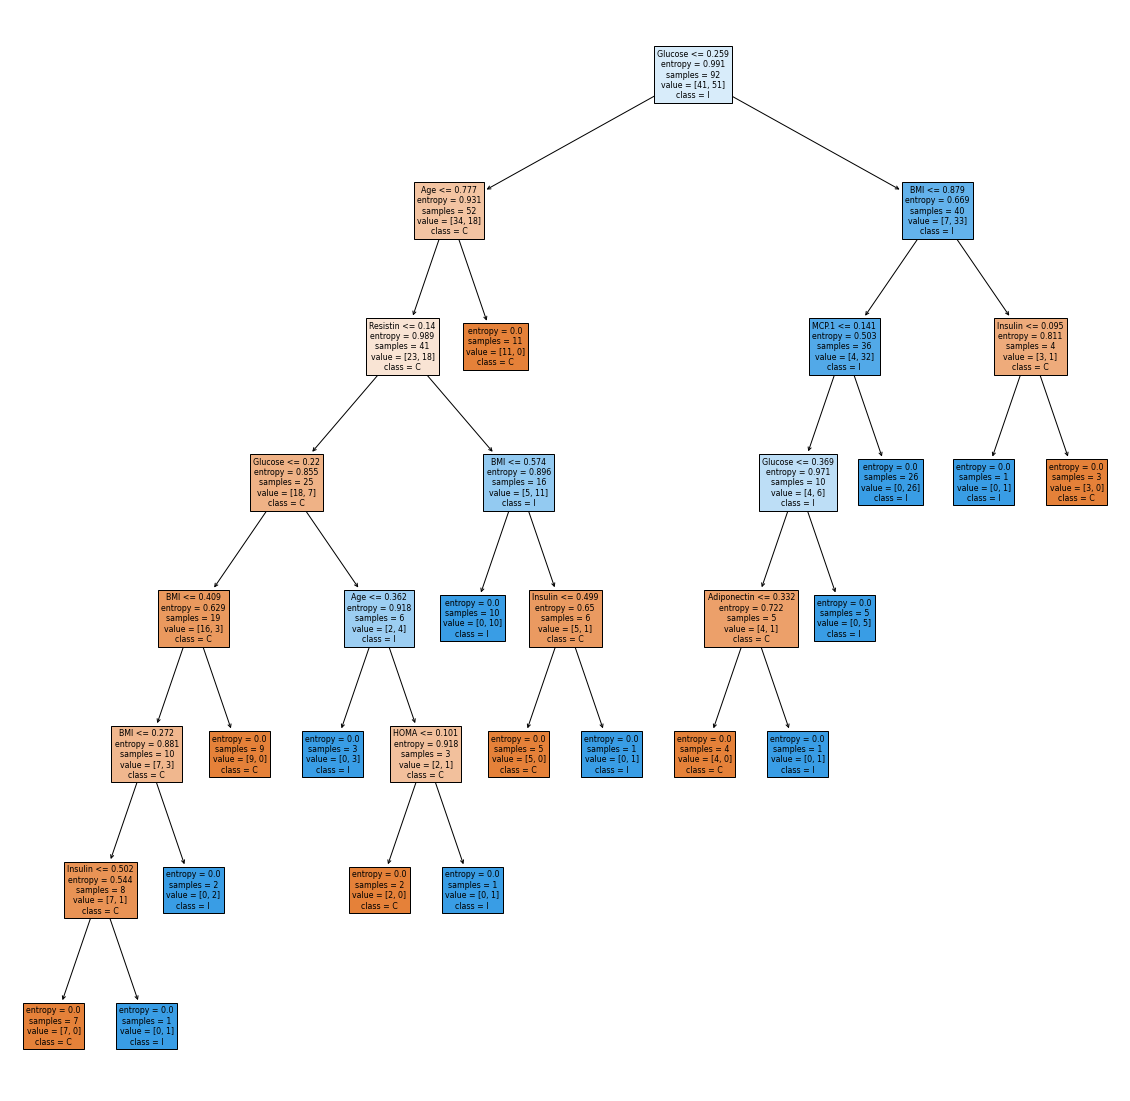

In [39]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf_tree, feature_names=list(df.columns.values)[:9], class_names=list(df.columns.values)[9] ,filled=True)